Ajout de graphique pour visualiser l'évolution du model

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

#os.chdir("/content/gdrive/MyDrive/fruitsPommeCeriseOrange")  #sert a définir le chemin ou le dossier de travail dans google drive. 
#sys.path.append("/content/gdrive/MyDrive/fruitsPommeCeriseOrange") #sert a définir le chemin ou le dossier de travail dans google drive. 

#!cp -r <'PATH_TO_PNG_FOLDER'> /content/gdrive/My Drive/    #sa ne marche tentative regler probleme dajout dimage des video dans le Drive https://datascience.stackexchange.com/questions/64131/how-to-save-dynamic-files-from-colab-to-google-drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt


import numpy as np
import os
import PIL

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
img_height, img_width = 32, 32
batch_size = 20

train_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/fruitsPommeCeriseOrange/train",
   # "fruitsPommeCeriseOrange/train",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/fruitsPommeCeriseOrange/validation",
   # "fruitsPommeCeriseOrange/validation",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/drive/MyDrive/fruitsPommeCeriseOrange/test",
    #"fruitsPommeCeriseOrange/test",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 590 files belonging to 3 classes.
Found 60 files belonging to 3 classes.
Found 119 files belonging to 3 classes.


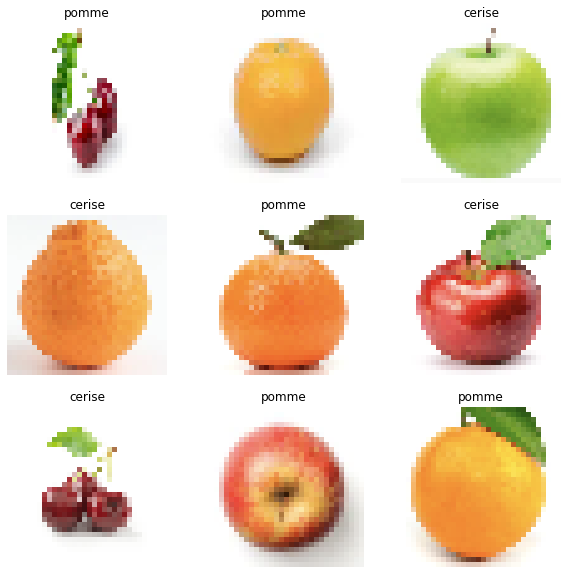

In [ ]:
class_names = ["pomme", "cerise", "orange"]
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
num_classes = len(class_names)

model = tf.keras.Sequential(
    [
     tf.keras.layers.Rescaling(1./255),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation="relu"),
     tf.keras.layers.Dense(3)
    ]
)


In [ ]:
model.compile(
    optimizer="adam",
    #loss=tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [ ]:
epochs=20  #etait a 10
hist = model.fit(
    train_ds,
    validation_data = val_ds,
    epochs=epochs
)

Epoch 1/20
30/30 [==============================] - 12s 343ms/step - loss: 0.8161 - accuracy: 0.6966 - val_loss: 1.4901 - val_accuracy: 0.2667
Epoch 2/20
30/30 [==============================] - 12s 346ms/step - loss: 0.8092 - accuracy: 0.6966 - val_loss: 1.3588 - val_accuracy: 0.2667
Epoch 3/20
30/30 [==============================] - 13s 322ms/step - loss: 0.8251 - accuracy: 0.6966 - val_loss: 1.4595 - val_accuracy: 0.2667
Epoch 4/20
30/30 [==============================] - 12s 347ms/step - loss: 0.8109 - accuracy: 0.6966 - val_loss: 1.3809 - val_accuracy: 0.2667
Epoch 5/20
30/30 [==============================] - 12s 314ms/step - loss: 0.8056 - accuracy: 0.6966 - val_loss: 1.4355 - val_accuracy: 0.2667
Epoch 6/20
30/30 [==============================] - 12s 343ms/step - loss: 0.7953 - accuracy: 0.6966 - val_loss: 1.4831 - val_accuracy: 0.2667
Epoch 7/20
30/30 [==============================] - 14s 357ms/step - loss: 0.8019 - accuracy: 0.6966 - val_loss: 1.6066 - val_accuracy: 0.2667

NOTE:Modifier la bande d'image de cerise. IL doit en avoir trop peut ou autre a voir

premier entrainement

on sauvegarde le model dans la variable hist pour pouvoir faire 2 graphique

un représentant la précision du modele traineing accuracy  et validation accuracy

lautre traning loss  et validation loss

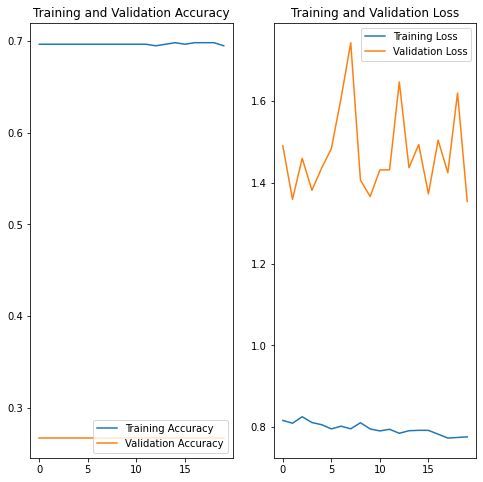

In [ ]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

va nous donner un graphique représentant

**Augmentation des données**

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

Visualisons à quoi ressemblent quelques exemples augmentés en appliquant plusieurs fois l'augmentation de données à la même image :

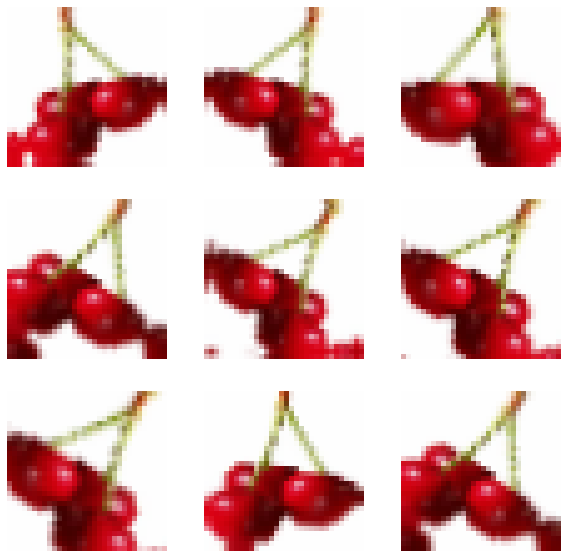

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

bref sa va prendre une image et sa va lui faire plusieur operation géometrique. genre inservé l'imgage. La tourner a droite etc .bref les operation geometrique quon peut faire avec une image 

**Abandonner**

Une autre technique pour réduire le surajustement consiste à introduire une régularisation des abandons dans le réseau.

Lorsque vous appliquez une suppression à une couche, elle supprime de manière aléatoire (en définissant l'activation sur zéro) un certain nombre d'unités de sortie de la couche pendant le processus d'apprentissage. L'abandon prend un nombre fractionnaire comme valeur d'entrée, sous la forme de 0,1, 0,2, 0,4, etc. Cela signifie abandonner 10 %, 20 % ou 40 % des unités de sortie au hasard de la couche appliquée.

Créons un nouveau réseau de neurones avec tf.keras.layers.Dropout avant de l'entraîner à l'aide des images augmentées :


In [ ]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

**Compiler et entraîner le modèle**

réentrainement du modele. c po juste un réentrénement il fait dautre a faire aussi (a revoir )

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_7 (Sequential)   (None, 32, 32, 3)         0         
                                                                 
 rescaling_6 (Rescaling)     (None, 32, 32, 3)         0         
                                                                 
 conv2d_18 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 16, 16, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 8, 8, 32)         0         
 g2D)                                                 

In [ ]:
epochs = 20  #etait a 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


30/30 [==============================] - 17s 333ms/step - loss: 0.8779 - accuracy: 0.6831 - val_loss: 1.2970 - val_accuracy: 0.2667
Epoch 2/20
30/30 [==============================] - 12s 348ms/step - loss: 0.8296 - accuracy: 0.6966 - val_loss: 1.4660 - val_accuracy: 0.2667
Epoch 3/20
30/30 [==============================] - 12s 330ms/step - loss: 0.8186 - accuracy: 0.6966 - val_loss: 1.5253 - val_accuracy: 0.2667
Epoch 4/20
30/30 [==============================] - 13s 307ms/step - loss: 0.8171 - accuracy: 0.6966 - val_loss: 1.5206 - val_accuracy: 0.2667
Epoch 5/20
30/30 [==============================] - 12s 347ms/step - loss: 0.8141 - accuracy: 0.6966 - val_loss: 1.4815 - val_accuracy: 0.2667
Epoch 6/20
30/30 [==============================] - 12s 322ms/step - loss: 0.8054 - accuracy: 0.6966 - val_loss: 1.4883 - val_accuracy: 0.2667
Epoch 7/20
30/30 [==============================] - 12s 347ms/step - loss: 0.8216 - accuracy: 0.6966 - val_loss: 1.4356 - val_accuracy: 0.2667
Epoch 8/20

**Visualisez les résultats de l'entraînement**

Après avoir appliqué l'augmentation des données et tf.keras.layers.Dropout , il y a moins de surajustement qu'auparavant, et la précision de la formation et de la validation est plus proche :

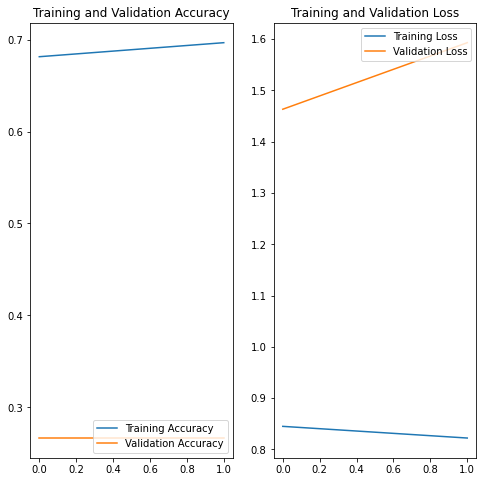

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model.evaluate(test_ds)

In [ ]:
import numpy

plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  classifications = model(images)
  # print(classifications)
  
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("modelPommeCeriseOrange1.tflite", 'wb') as f:
  f.write(tflite_model)